In [1059]:
import pandas as pd

class Data:
    def __init__(self, normal_data_file_path: str = 'ptbdb_normal.csv', abnormal_data_file_path: str = 'ptbdb_abnormal.csv') -> None:
        self.normal_data_file_path = normal_data_file_path
        self.abnormal_data_file_path = abnormal_data_file_path
        self.normal_dataframe = pd.read_csv(self.normal_data_file_path, header=None)
        self.abnormal_dataframe = pd.read_csv(self.abnormal_data_file_path, header=None)
        self.dataframe = pd.concat([self.normal_dataframe, self.abnormal_dataframe], axis=0)

In [1060]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import Tuple

class IDataAnalyzer:
    def __init__(self, dataframe: pd.DataFrame = Data().dataframe) -> None:
        self.dataframe = dataframe
        self.replace_nan_with_zero()
        self.split_labels_from_features()
        self.normalize_data()
        self.split_test_from_train()

    def replace_nan_with_zero(self) -> None:
        self.dataframe.fillna(0, inplace=True)

    def split_labels_from_features(self) -> None:
        self.x = self.dataframe.iloc[:, :-1]
        self.y = self.dataframe.iloc[:, -1]

    def normalize_data(self) -> None:
        standard_scaler = StandardScaler()
        dataframe_new = standard_scaler.fit_transform(self.x)
        self.x = pd.DataFrame(dataframe_new, index=self.x.index, columns=self.x.columns)

    def split_test_from_train(self) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=19)

    def __call__(self) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        return self.x_train, self.x_test, self.y_train, self.y_test

In [1061]:
import matplotlib.pyplot as plt

class ClassEquilibriumAnalyzer(IDataAnalyzer):
    @staticmethod
    def get_histogram_counts(dataframe: pd.DataFrame) -> pd.core.series.Series:
        histogram_counts = dataframe.value_counts().sort_index()
        return histogram_counts

    @staticmethod
    def get_histogram(histogram_counts: pd.core.series.Series, title: str) -> None:
        plt.figure(figsize=(5, 3))
        histogram_counts.plot.bar()
        plt.title(title)
        plt.xticks(ticks=[0, 1], labels=["normal", "abnormal"])
        plt.xlabel('Type')
        plt.ylabel('Freq')
        plt.grid(True)
        plt.show()

    @staticmethod
    def analyze_class_equilibrium_for_dataframe(dataframe: pd.DataFrame, title: str) -> None:
        histogram_counts = ClassEquilibriumAnalyzer.get_histogram_counts(dataframe)
        ClassEquilibriumAnalyzer.get_histogram(histogram_counts, title)

    def __call__(self) -> None:
        ClassEquilibriumAnalyzer.analyze_class_equilibrium_for_dataframe(self.y_train, 'Histogram of labels in train dataset')
        ClassEquilibriumAnalyzer.analyze_class_equilibrium_for_dataframe(self.y_test, 'Histogram of labels in test dataset')

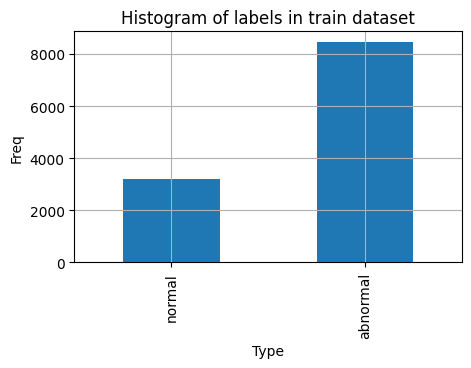

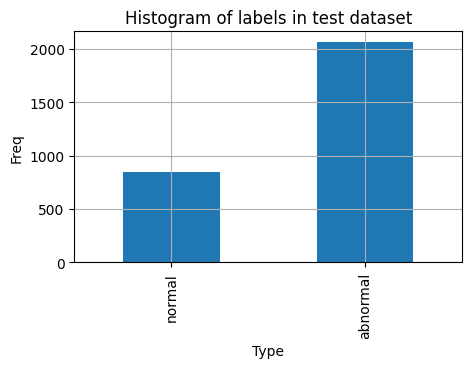

In [1062]:
class_equilibrium_analyzer = ClassEquilibriumAnalyzer()
class_equilibrium_analyzer()

In [1063]:
from typing import List
import matplotlib.pyplot as plt

class TimeSeriesVisualizer(IDataAnalyzer):
    def get_unique_values(self) -> List[float]:
        unique_values = self.dataframe.iloc[:, -1].unique()
        return unique_values

    def get_categories_dict(self) -> dict:
        categories_dict = {}
        categories_dict[0.0] = 'normal'
        categories_dict[1.0] = 'abnormal'
        return categories_dict

    def visualize_time_series_example_of_every_category(self) -> None:
        unique_values = self.get_unique_values()
        categories_dict = self.get_categories_dict()

        for category in unique_values:
            category_dataframe = self.dataframe[self.dataframe.iloc[:, -1] == category]
            example_series = category_dataframe.iloc[1, :-1]

            plt.figure(figsize=(5, 3))
            example_series.plot()
            plt.title(f'Time series example of category {categories_dict[category]}')
            plt.xticks([])
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.grid(True)
            plt.show()

    def plot_mean_std_of_every_category(self) -> None:
        unique_values = self.get_unique_values()
        categories_dict = self.get_categories_dict()

        for category in unique_values:
            category_dataframe = self.dataframe[self.dataframe.iloc[:, -1] == category]
            means = category_dataframe.iloc[:, :-1].mean()
            std_devs = category_dataframe.iloc[:, :-1].std()

            plt.figure(figsize=(5, 3))
            means.plot(label='mean', color='blue')
            std_devs.plot(label='std', color='orange')
            plt.title(f'Mean and std of time series for {categories_dict[category]} category')
            plt.xticks([])
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.grid(True)
            plt.legend()
            plt.show()

    def __call__(self) -> None:
        self.visualize_time_series_example_of_every_category()
        self.plot_mean_std_of_every_category()

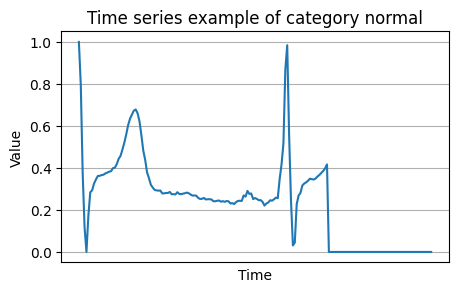

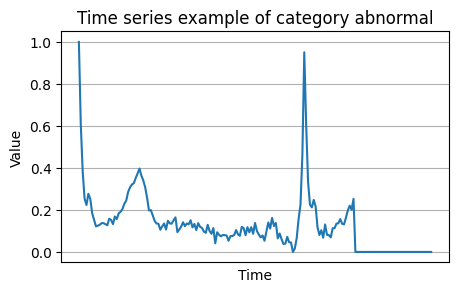

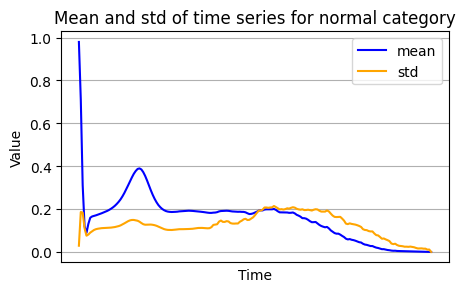

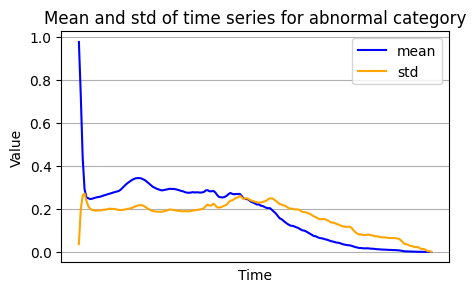

In [1064]:
time_series_visualizer = TimeSeriesVisualizer()
time_series_visualizer()

In [1065]:
# Add code from tema1.ipynb

import pandas as pd
import numpy as np
from abc import abstractmethod

class DataPatients:
    def __init__(self, data_file_path: str = 'date_tema_1_iaut_2024.csv') -> None:
        self.data_file_path = data_file_path
        self.dataframe = pd.read_csv(self.data_file_path)

class IDataPatientsAnalyzer():
    def __init__(self, attribute: str, dataframe: pd.DataFrame = DataPatients().dataframe) -> None:
        self.attribute = attribute
        self.dataframe = dataframe
        self.attribute_data = dataframe[attribute]

class INumericalDataAnalyzer(IDataPatientsAnalyzer):
    @abstractmethod
    def _correct_value(self, value: float) -> float:
        pass

    def correct(self):
        self.attribute_data = self.attribute_data.apply(self._correct_value)

    def get_mean(self) -> float:
        mean = self.attribute_data.mean()
        return mean

    def get_standard_deviation(self) -> float:
        std = self.attribute_data.std()
        return std

    def get_mean_absolute_deviation(self) -> float:
        mean = self.get_mean()
        mad = (self.attribute_data - mean).abs().mean()
        return mad

    def get_min_value(self) -> float:
        min = self.attribute_data.min()
        return min

    def get_max_value(self) -> float:
        max = self.attribute_data.max()
        return max

    def get_range(self) -> float:
        range = self.get_max_value() - self.get_min_value()
        return range

    def get_median(self) -> float:
        median = self.attribute_data.median()
        return median

    def get_median_absolute_deviation(self) -> float:
        median = self.get_median()
        madm = (self.attribute_data - median).abs().median()
        return madm

    def get_interquartile_range(self) -> float:
        q1 = self.attribute_data.quantile(0.25)
        q3 = self.attribute_data.quantile(0.75)
        interquartile_range = q3 - q1
        return interquartile_range

    def __call__(self) -> None:
        self.correct()

        mean = self.get_mean()
        print("Mean: " + str(mean))

        std = self.get_standard_deviation()
        print("Standard deviation: " + str(std))

        mad = self.get_mean_absolute_deviation()
        print("Mean absolute deviation: " + str(mad))

        min = self.get_min_value()
        print("Min: " + str(min))

        max = self.get_max_value()
        print("Max: " + str(max))

        range = self.get_range()
        print("Range: " + str(range))

        median = self.get_median()
        print("Median: " + str(median))

        madm = self.get_median_absolute_deviation()
        print("Median absolute deviation: " + str(madm))

        interquartile_range = self.get_interquartile_range()
        print("Interquartile range: " + str(interquartile_range))

class ReplaceCommaNumericalDataAnalyzer(INumericalDataAnalyzer):
    # Change first appearing comma to dot
    @staticmethod
    def _correct_value(value):
        if isinstance(value, int):
            return value
        elif isinstance(value, str) and ',' in value:
            parts = value.split(',')
            corrected_value = parts[0] + '.' + ''.join(parts[1:])
            return float(corrected_value)
        elif isinstance(value, str):
            try:
                return float(value)
            except ValueError:
                raise (f"Value {value} is not a number")
        else:
            return value

class AddDotAfterFirstDigitNumericalDataAnalyzer(INumericalDataAnalyzer):
    # Remove commas and add a dot after the first digit
    @staticmethod
    def _correct_value(value):
        if isinstance(value, int):
            return value

        if isinstance(value, str) and ',' in value:
            value = value.replace(',', '')
        if isinstance(value, str) and len(value) > 1:
            value = value[0] + '.' + value[1:]

        try:
            return float(value)
        except ValueError:
            raise ValueError(f"Value {value} is not a number")
        except TypeError:
            return value

class AddDotAfterSecondDigitNumericalDataAnalyzer(INumericalDataAnalyzer):
    # Remove commas and add a dot after the second digit
    @staticmethod
    def _correct_value(value):
        if isinstance(value, int):
            return value

        if isinstance(value, str) and ',' in value:
            value = value.replace(',', '')
        if isinstance(value, str) and len(value) > 2:
            value = value[0] + value[1] + '.' + value[2:]

        try:
            return float(value)
        except ValueError:
            raise ValueError(f"Value {value} is not a number")
        except TypeError:
            return value

class WeightNumericalDataAnalyzer(INumericalDataAnalyzer):
    # Converts weights starting with 1, 2, 3 to hundreds, and other hundreds to tens
    @staticmethod
    def _correct_value(value):
        if isinstance(value, int):
            return value

        if isinstance(value, str):
            if value == "-1":
                return np.nan

            value = value.replace(',', '')

            if len(value) > 2:
                if value[0] in ['1', '2']:
                    if len(value) > 3:
                        value = value[:3] + '.' + value[3:]
                else:
                    value = value[0] + value[1] + '.' + value[2:]

            try:
                return float(value)
            except ValueError:
                raise ValueError(f"Value {value} is not a number")
        return value

class TechnologyTimeUseNumericalDataAnalyzer(INumericalDataAnalyzer):
    # Converts ints larger than 10 to order of 1
    @staticmethod
    def _correct_value(value):
        try:
            if isinstance(value, int):
                if isinstance(value, int) and value >= 10:
                    value = str(value)
                    value = float(value[0] + '.' + value[1:])
                return value
        except ValueError:
            raise ValueError(f"Value {value} is not a number")

regular_fiber_diet_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Regular_fiber_diet')
regular_fiber_diet_data_analyzer()

sedentary_hours_daily_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Sedentary_hours_daily')
sedentary_hours_daily_data_analyzer()

age_data_analyzer = AddDotAfterSecondDigitNumericalDataAnalyzer('Age')
age_data_analyzer()

est_avg_calorie_intake_data_analyzer = ReplaceCommaNumericalDataAnalyzer('Est_avg_calorie_intake')
est_avg_calorie_intake_data_analyzer()

main_meals_daily_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Main_meals_daily')
main_meals_daily_data_analyzer()

height_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Height')
height_data_analyzer()

water_daily_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Water_daily')
water_daily_data_analyzer()

weight_data_analyzer = WeightNumericalDataAnalyzer('Weight')
weight_data_analyzer()

physical_activity_level_data_analyzer = AddDotAfterFirstDigitNumericalDataAnalyzer('Physical_activity_level')
physical_activity_level_data_analyzer()

technology_time_use_data_analyzer = TechnologyTimeUseNumericalDataAnalyzer('Technology_time_use')
technology_time_use_data_analyzer()

class ICorrecter():
    def get_mappings(self) -> None:
        self.transportation_mapping = {'Bike': 0, 'Walking': 1, 'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4}
        self.diagnostic_in_family_history_mapping = {'no': 0, 'yes': 1}
        self.high_calorie_diet_mapping = {'no': 0, 'yes': 1}
        self.alcohol_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
        self.snacks_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
        self.smoker_mapping = {'no': 0, 'yes': 1}
        self.calorie_monitoring_mapping = {'yes': 0, 'no': 1}
        self.gender_mapping = {'Male': 0, 'Female': 1}
        self.diagnostic_mapping = {'D0': 0, 'D1': 1, 'D2': 2, 'D3': 3, 'D4': 4, 'D5': 5, 'D6': 6}

    def correct(self) -> None:
        self.dataframe['Transportation'] = self.dataframe['Transportation'].map(self.transportation_mapping)
        self.dataframe['Regular_fiber_diet'] = regular_fiber_diet_data_analyzer.attribute_data
        self.dataframe['Diagnostic_in_family_history'] = self.dataframe['Diagnostic_in_family_history'].map(self.diagnostic_in_family_history_mapping)
        self.dataframe['High_calorie_diet'] = self.dataframe['High_calorie_diet'].map(self.high_calorie_diet_mapping)
        self.dataframe['Sedentary_hours_daily'] = sedentary_hours_daily_data_analyzer.attribute_data
        self.dataframe['Age'] = age_data_analyzer.attribute_data
        self.dataframe['Alcohol'] = self.dataframe['Alcohol'].map(self.alcohol_mapping)
        self.dataframe['Est_avg_calorie_intake'] = est_avg_calorie_intake_data_analyzer.attribute_data
        self.dataframe['Main_meals_daily'] = main_meals_daily_data_analyzer.attribute_data
        self.dataframe['Snacks'] = self.dataframe['Snacks'].map(self.snacks_mapping)
        self.dataframe['Height'] = height_data_analyzer.attribute_data
        self.dataframe['Smoker'] = self.dataframe['Smoker'].map(self.smoker_mapping)
        self.dataframe['Water_daily'] = water_daily_data_analyzer.attribute_data
        self.dataframe['Calorie_monitoring'] = self.dataframe['Calorie_monitoring'].map(self.calorie_monitoring_mapping)
        self.dataframe['Weight'] = weight_data_analyzer.attribute_data
        self.dataframe['Physical_activity_level'] = physical_activity_level_data_analyzer.attribute_data
        self.dataframe['Technology_time_use'] = technology_time_use_data_analyzer.attribute_data
        self.dataframe['Gender'] = self.dataframe['Gender'].map(self.gender_mapping)
        self.dataframe['Diagnostic'] = self.dataframe['Diagnostic'].map(self.diagnostic_mapping)

from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import Tuple

class DataCorrecter(ICorrecter):
    def __init__(self, dataframe: pd.DataFrame = DataPatients().dataframe) -> None:
        self.dataframe = dataframe

    def split_discrete_from_numerical(self) -> None:
        self.discrete_columns = ['Diagnostic', 'Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet', 'Alcohol', 'Snacks', 'Smoker', 'Calorie_monitoring', 'Gender']
        self.numerical_columns = ['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level', 'Technology_time_use']

    def standardize_data(self) -> None:
        standard_scaler = StandardScaler()
        dataframe_new = standard_scaler.fit_transform(self.x)
        self.x = pd.DataFrame(dataframe_new, index=self.x.index, columns=self.x.columns)

    def treat_missing_values(self) -> None:
        discrete_simple_imputer = SimpleImputer(strategy='most_frequent')
        self.dataframe[self.discrete_columns] = discrete_simple_imputer.fit_transform(self.dataframe[self.discrete_columns])

        numerical_simple_imputer = SimpleImputer(strategy='mean')
        self.dataframe[self.numerical_columns] = numerical_simple_imputer.fit_transform(self.dataframe[self.numerical_columns])

    def select_attributes(self) -> None:
        select_percentile = SelectPercentile(score_func=f_classif, percentile=50)
        dataframe_new = select_percentile.fit_transform(self.x, self.y)
        support = select_percentile.get_support()
        selected_columns = self.x.columns[support]
        self.x = pd.DataFrame(dataframe_new, index=self.x.index, columns=selected_columns)
        print("Selected attributes after feature selection:", self.x.columns.tolist())

    def split_test_from_train(self) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=19)

    def __call__(self) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        self.split_discrete_from_numerical()
        self.get_mappings()
        self.correct()
        self.treat_missing_values()
        self.y = self.dataframe['Diagnostic']
        self.x = self.dataframe.drop('Diagnostic', axis=1)
        self.standardize_data()
        self.select_attributes()
        self.split_test_from_train()
        return self.x_train, self.x_test, self.y_train, self.y_test

Mean: 2.4205433206663196
Standard deviation: 0.5331182497761687
Mean absolute deviation: 0.4780707370851931
Min: 1.0
Max: 3.0
Range: 2.0
Median: 2.387426
Median absolute deviation: 0.38742600000000005
Interquartile range: 1.0
Mean: 3.2005912545549196
Standard deviation: 0.5936622909310287
Mean absolute deviation: 0.4741994325031888
Min: 2.21
Max: 9.5658
Range: 7.3557999999999995
Median: 3.13
Median absolute deviation: 0.43999999999999995
Interquartile range: 0.8700000000000001
Mean: 24.348629116605935
Standard deviation: 6.4076890889428455
Mean absolute deviation: 4.8115325284511234
Min: 15.0
Max: 61.0
Range: 46.0
Median: 22.828435
Median absolute deviation: 3.171565000000001
Interquartile range: 6.044743
Mean: 2253.68766267569
Standard deviation: 434.07579419142866
Mean absolute deviation: 375.36234408538627
Min: 1500
Max: 3000
Range: 1500
Median: 2253.0
Median absolute deviation: 380.0
Interquartile range: 757.0
Mean: 2.683471861009891
Standard deviation: 0.7791790556845525
Mean abso

In [1066]:
class IDataPatientsAnalyzer:
    def __init__(self, data: Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame] = DataCorrecter()()) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = data

    def __call__(self) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        return self.x_train, self.x_test, self.y_train, self.y_test

Selected attributes after feature selection: ['Regular_fiber_diet', 'Diagnostic_in_family_history', 'High_calorie_diet', 'Age', 'Alcohol', 'Snacks', 'Height', 'Weight', 'Gender']


In [1067]:
import torch
import torch.nn as nn

class MultiLayeredPerceptronPTBDB(nn.Module):
    def __init__(self, input_size: int) -> None:
        super(MultiLayeredPerceptronPTBDB, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [1068]:
import torch.nn.functional as F

class MultiLayeredPerceptronPatients(nn.Module):
    def __init__(self, input_size: int) -> None:
        super(MultiLayeredPerceptronPatients, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 7)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.softmax(self.fc4(x), dim=1)
        return x

In [1069]:
class Convolutional1D(nn.Module):
    def __init__(self, kernel_size: int = 3) -> None:
        super(Convolutional1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=kernel_size, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=kernel_size, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=kernel_size, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * (187 // 8), 64)
        self.fc2 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 256 * (x.shape[2]))
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

In [1070]:
from abc import abstractmethod
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from typing import Union

class ITrainerTester():
    def __init__(self, data_analyzer: Union[IDataAnalyzer, IDataPatientsAnalyzer] = IDataAnalyzer(), criterion: Union[nn.BCELoss, nn.CrossEntropyLoss] = nn.BCELoss(), epoch_count: int = 20, batch_size: int = 8, learning_rate: float = 0.001) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = data_analyzer()
        self.criterion = criterion
        self.epoch_count = epoch_count
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def convert_dataframes_to_numbers(self):
        self.x_train = self.x_train.values
        self.x_test = self.x_test.values
        self.y_train = self.y_train.values
        self.y_test = self.y_test.values

    def convert_to_torch_tensor(self) -> None:
        self.x_train = torch.tensor(self.x_train, dtype=torch.float32)
        self.x_test = torch.tensor(self.x_test, dtype=torch.float32)
        self.y_train = torch.tensor(self.y_train, dtype=torch.float32)
        self.y_test = torch.tensor(self.y_test, dtype=torch.float32)

    def create_data_loader(self, x: torch.Tensor, y: torch.Tensor, shuffle: bool = True) -> DataLoader:
        tensor_dataset = TensorDataset(x, y)
        data_loader = DataLoader(tensor_dataset, batch_size=self.batch_size, shuffle=shuffle)
        return data_loader

    @abstractmethod
    def set_model(self) -> None:
        # Set model
        pass

    def train_model(self) -> None:
        self.train_data_loader = self.create_data_loader(self.x_train, self.y_train)
        self.test_data_loader = self.create_data_loader(self.x_test, self.y_test, shuffle=False)

        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        self.train_loss_values = []
        self.test_loss_values = []

        for epoch in range(self.epoch_count):
            print(f'Epoch {epoch + 1}/{self.epoch_count}')
            self.model.train()
            epoch_train_loss_value = 0.0

            for inputs, labels in self.train_data_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)

                outputs = outputs.squeeze()
                if outputs.dim() == 0:
                    outputs = outputs.unsqueeze(0)
                labels = labels.view(-1)

                train_loss = self.criterion(outputs, labels)
                train_loss.backward()
                optimizer.step()
                epoch_train_loss_value += train_loss.item()

            train_loss_value = epoch_train_loss_value / len(self.train_data_loader)
            self.train_loss_values.append(train_loss_value)
            print(f'Train Loss: {train_loss_value}')

            epoch_test_loss_value = 0.0
            self.model.eval()

            with torch.no_grad():
                for inputs, labels in self.test_data_loader:
                    outputs = self.model(inputs)

                    outputs = outputs.squeeze()
                    if outputs.dim() == 0:
                        outputs = outputs.unsqueeze(0)
                    labels = labels.view(-1)

                    test_loss = self.criterion(outputs, labels)
                    epoch_test_loss_value += test_loss.item()

            test_loss_value = epoch_test_loss_value / len(self.test_data_loader)
            self.test_loss_values.append(test_loss_value)
            print(f'Test Loss: {test_loss_value}')

    def test_model(self) -> None:
        self.model.eval()

        y_pred_list = []
        y_label_list = []

        with torch.no_grad():
            for inputs, labels in self.test_data_loader:
                outputs = self.model(inputs)
                outputs = (outputs.squeeze() > 0.5).int().cpu().numpy().flatten()
                y_pred_list.append(outputs)

                labels = labels.int().cpu().numpy()
                y_label_list.append(labels)

        self.y_pred = np.concatenate(y_pred_list)
        self.y_label = np.concatenate(y_label_list)

        self.accuracy_score = accuracy_score(self.y_label, self.y_pred)
        self.precision_score = precision_score(self.y_label, self.y_pred)
        self.recall_score = recall_score(self.y_label, self.y_pred)
        self.f1_score = f1_score(self.y_label, self.y_pred)
        self.confusion_matrix = confusion_matrix(self.y_label, self.y_pred)

    def plot_loss_functions(self) -> None:
        epochs = range(1, len(self.train_loss_values) + 1)

        plt.figure(figsize=(5, 3))
        plt.plot(epochs, self.train_loss_values, label='Train Loss', color='blue')
        plt.plot(epochs, self.test_loss_values, label='Test Loss', color='orange')

        plt.title('Train vs Test Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.legend()
        plt.show()

    def print_scores(self) -> None:
        print(f'Accuracy score: {self.accuracy_score}%')
        print(f'Precision score: {self.precision_score}')
        print(f'Recall score: {self.recall_score}')
        print(f'F1 score: {self.f1_score}')
        print(f'Confusion matrix:\n{self.confusion_matrix}')


In [1071]:
class ITrainerTesterPatients(ITrainerTester):
    def train_model(self) -> None:
        self.train_data_loader = self.create_data_loader(self.x_train, self.y_train)
        self.test_data_loader = self.create_data_loader(self.x_test, self.y_test, shuffle=False)

        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        self.train_loss_values = []
        self.test_loss_values = []

        for epoch in range(self.epoch_count):
            print(f'Epoch {epoch + 1}/{self.epoch_count}')
            self.model.train()
            epoch_train_loss_value = 0.0

            for inputs, labels in self.train_data_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                labels = labels.long()

                train_loss = self.criterion(outputs, labels)
                train_loss.backward()
                optimizer.step()
                epoch_train_loss_value += train_loss.item()

            train_loss_value = epoch_train_loss_value / len(self.train_data_loader)
            self.train_loss_values.append(train_loss_value)
            print(f'Train Loss: {train_loss_value}')

            epoch_test_loss_value = 0.0
            self.model.eval()

            with torch.no_grad():
                for inputs, labels in self.test_data_loader:
                    outputs = self.model(inputs)
                    labels = labels.long()

                    test_loss = self.criterion(outputs, labels)
                    epoch_test_loss_value += test_loss.item()

            test_loss_value = epoch_test_loss_value / len(self.test_data_loader)
            self.test_loss_values.append(test_loss_value)
            print(f'Test Loss: {test_loss_value}')

    def test_model(self) -> None:
        self.model.eval()

        y_pred_list = []
        y_label_list = []

        with torch.no_grad():
            for inputs, labels in self.test_data_loader:
                outputs = self.model(inputs)
                _, outputs = torch.max(outputs, 1)
                outputs = outputs.cpu().numpy()
                y_pred_list.append(outputs)

                labels = labels.cpu().numpy()
                y_label_list.append(labels)

        self.y_pred = np.concatenate(y_pred_list)
        self.y_label = np.concatenate(y_label_list)

        self.accuracy_score = accuracy_score(self.y_label, self.y_pred)
        self.precision_score = precision_score(self.y_label, self.y_pred, average='weighted')
        self.recall_score = recall_score(self.y_label, self.y_pred, average='weighted')
        self.f1_score = f1_score(self.y_label, self.y_pred, average='weighted')
        self.confusion_matrix = confusion_matrix(self.y_label, self.y_pred)

In [1072]:
class MultiLayeredPerceptronPTBDBTrainerTester(ITrainerTester):
    def __init__(self) -> None:
        super().__init__(epoch_count=25, batch_size=16, learning_rate=0.001)

    def set_model(self) -> None:
        self.model = MultiLayeredPerceptronPTBDB(input_size=self.x_train.shape[1])

    def __call__(self) -> None:
        self.convert_dataframes_to_numbers()
        self.convert_to_torch_tensor()
        self.set_model()
        self.train_model()
        self.test_model()
        self.plot_loss_functions()
        self.print_scores()

Epoch 1/25
Train Loss: 0.42018030896005065
Test Loss: 0.3438791391941217
Epoch 2/25
Train Loss: 0.334395210560575
Test Loss: 0.3043867499045618
Epoch 3/25
Train Loss: 0.30628052780629844
Test Loss: 0.2581862385620128
Epoch 4/25
Train Loss: 0.27713794145313514
Test Loss: 0.2510193298151205
Epoch 5/25
Train Loss: 0.25802490657584354
Test Loss: 0.22557971249897402
Epoch 6/25
Train Loss: 0.25763958201047726
Test Loss: 0.20990606105712417
Epoch 7/25
Train Loss: 0.2327482676604292
Test Loss: 0.20644098450685597
Epoch 8/25
Train Loss: 0.24642502130418606
Test Loss: 0.1942431204901128
Epoch 9/25
Train Loss: 0.21570534865975707
Test Loss: 0.18694026032360372
Epoch 10/25
Train Loss: 0.21833245551078018
Test Loss: 0.22583140469678156
Epoch 11/25
Train Loss: 0.2115411544871097
Test Loss: 0.17636039972837483
Epoch 12/25
Train Loss: 0.21359384664026368
Test Loss: 0.19416929479524658
Epoch 13/25
Train Loss: 0.191998239250017
Test Loss: 0.20332222570061356
Epoch 14/25
Train Loss: 0.1932049240746822
Te

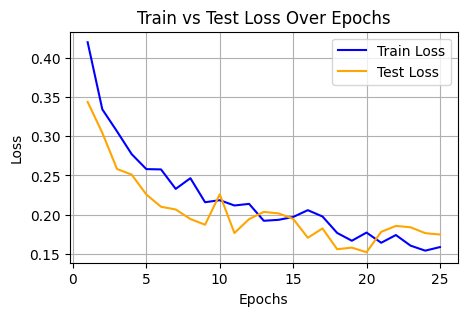

Accuracy score: 0.9488148402610787%
Precision score: 0.9565217391304348
Recall score: 0.9718446601941747
F1 score: 0.9641223212135807
Confusion matrix:
[[ 760   91]
 [  58 2002]]


In [1073]:
multi_layered_perceptron_ptbdb_trainer_tester = MultiLayeredPerceptronPTBDBTrainerTester()
multi_layered_perceptron_ptbdb_trainer_tester()

In [1074]:
class MultiLayeredPerceptronPatientsTrainerTester(ITrainerTesterPatients):
    def __init__(self) -> None:
        super().__init__(data_analyzer=IDataPatientsAnalyzer(), criterion=nn.CrossEntropyLoss(), epoch_count=100, batch_size=8, learning_rate=0.001)

    def set_model(self) -> None:
        self.model = MultiLayeredPerceptronPatients(input_size=self.x_train.shape[1])

    def __call__(self) -> None:
        self.convert_dataframes_to_numbers()
        self.convert_to_torch_tensor()
        self.set_model()
        self.train_model()
        self.test_model()
        self.plot_loss_functions()
        self.print_scores()

Epoch 1/100
Train Loss: 1.8847136658926804
Test Loss: 1.7278839739001528
Epoch 2/100
Train Loss: 1.736782466371854
Test Loss: 1.649868860536692
Epoch 3/100
Train Loss: 1.6948553919792175
Test Loss: 1.5989874212109312
Epoch 4/100
Train Loss: 1.653713135048747
Test Loss: 1.5609531913484846
Epoch 5/100
Train Loss: 1.6438336353749037
Test Loss: 1.54950120497723
Epoch 6/100
Train Loss: 1.6261792375395696
Test Loss: 1.5100302647571175
Epoch 7/100
Train Loss: 1.6008309312164783
Test Loss: 1.4956956371969106
Epoch 8/100
Train Loss: 1.5775528357674677
Test Loss: 1.4654802570537644
Epoch 9/100
Train Loss: 1.5673760200540225
Test Loss: 1.4459647475456705
Epoch 10/100
Train Loss: 1.5442195261518161
Test Loss: 1.4315177932077525
Epoch 11/100
Train Loss: 1.5365617386996746
Test Loss: 1.4250930766670071
Epoch 12/100
Train Loss: 1.521605808287859
Test Loss: 1.4244982977302707
Epoch 13/100
Train Loss: 1.505894608174761
Test Loss: 1.402874730071243
Epoch 14/100
Train Loss: 1.51018625497818
Test Loss: 1.

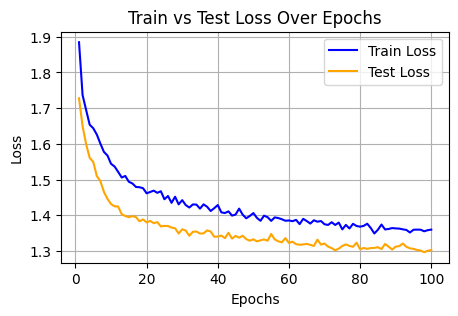

Accuracy score: 0.8623376623376623%
Precision score: 0.866456255178578
Recall score: 0.8623376623376623
F1 score: 0.8631881126608605
Confusion matrix:
[[49  1  5  2  0  0  0]
 [ 3 40  4  1  3  0  2]
 [ 0  7 39  2  3  0  1]
 [ 0  0  6 39  3  0  0]
 [ 0  0  1  3 51  1  0]
 [ 0  0  2  3  0 59  0]
 [ 0  0  0  0  0  0 55]]


In [1075]:
multi_layered_perceptron_patients_trainer_tester = MultiLayeredPerceptronPatientsTrainerTester()
multi_layered_perceptron_patients_trainer_tester()

In [1076]:
class Convolutional1DTrainerTester(ITrainerTester):
    def __init__(self) -> None:
        super().__init__(epoch_count=10, batch_size=8, learning_rate=0.001)

    def make_data_1d(self) -> None:
        self.x_train = np.expand_dims(self.x_train, axis=1)
        self.x_test = np.expand_dims(self.x_test, axis=1)

    def set_model(self) -> None:
        self.model = Convolutional1D(kernel_size=3)

    def __call__(self) -> None:
        self.convert_dataframes_to_numbers()
        self.convert_to_torch_tensor()
        self.make_data_1d()
        self.convert_to_torch_tensor()
        self.set_model()
        self.train_model()
        self.test_model()
        self.plot_loss_functions()
        self.print_scores()

/tmp/ipykernel_29577/3442459755.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_train = torch.tensor(self.y_train, dtype=torch.float32)
/tmp/ipykernel_29577/3442459755.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_test = torch.tensor(self.y_test, dtype=torch.float32)


Epoch 1/10
Train Loss: 0.3318631957362023
Test Loss: 0.267053090830354
Epoch 2/10
Train Loss: 0.17590883364153012
Test Loss: 0.10483792163290923
Epoch 3/10
Train Loss: 0.11702135660689243
Test Loss: 0.07564568225789517
Epoch 4/10
Train Loss: 0.09118015934286389
Test Loss: 0.10871847770588008
Epoch 5/10
Train Loss: 0.07924062380476549
Test Loss: 0.08644551860115726
Epoch 6/10
Train Loss: 0.061663842451235726
Test Loss: 0.15344662903424405
Epoch 7/10
Train Loss: 0.060035383961885985
Test Loss: 0.13616761020022267
Epoch 8/10
Train Loss: 0.050399769466214855
Test Loss: 0.10511284623175067
Epoch 9/10
Train Loss: 0.04947882093349354
Test Loss: 0.10573990970732637
Epoch 10/10
Train Loss: 0.03936419697500497
Test Loss: 0.11499551223282492


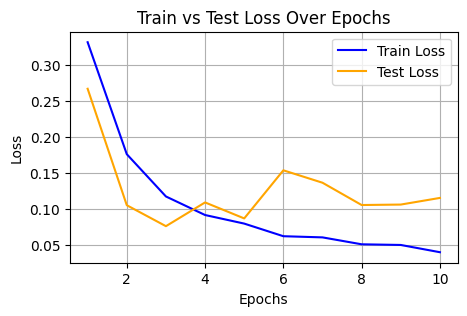

Accuracy score: 0.9838543455857094%
Precision score: 0.9902581587920117
Recall score: 0.9868932038834951
F1 score: 0.9885728178944809
Confusion matrix:
[[ 831   20]
 [  27 2033]]


In [1077]:
convolutional_1d_trainer_tester = Convolutional1DTrainerTester()
convolutional_1d_trainer_tester()